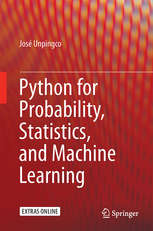

In [2]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

# Support Vector Machines

Support Vector Machines (SVM) originated from the statistical learning theory
developed by Vapnik-Chervonenkis. As such, it represents a deep application of
statistical theory that incorporates the VC dimension concepts we
discussed in the first section. Let's start by looking at some pictures.
Consider the two-dimensional classification problem shown in
[Figure](#fig:svm_001).  [Figure](#fig:svm_001) shows two classes (gray and
white
circles) that can be separated by any of the lines shown. Specifically, any
such separating line can be written as the locus of points ($\mathbf{x}$) in
the two-dimensional plane that satisfy the following,

<!-- dom:FIGURE: [fig-machine_learning/svm_001.png, width=500 frac=0.45] In the
two-dimensional plane, the two classes (gray and white circles) are easily
separated by any one of the lines shown.   <div id="fig:svm_001"></div>  -->
<!-- begin figure -->
<div id="fig:svm_001"></div>

<p>In the two-dimensional plane, the two classes (gray and white circles) are
easily separated by any one of the lines shown.</p>
<img src="fig-machine_learning/svm_001.png" width=500>

<!-- end figure -->

$$
\beta_0 + \boldsymbol{\beta}^T \mathbf{x} = 0
$$

 To classify  an arbitrary $\mathbf{x}$ using this line, we just
compute the sign of $\beta_0+\boldsymbol{\beta}^T \mathbf{x}$ and assign one
class to the positive sign and the other class to the negative sign.  To
uniquely specify such a separating line (or, hyperplane in a higher-dimensional
space) we need additional criteria.


[Figure](#fig:svm_002) shows the data with two bordering parallel lines that
form a margin around the central separating line.  The *maximal margin
algorithm* finds the widest margin and the unique separating line.  As a
consequence, the algorithm uncovers the elements in the data that touch the
margins. These are the *support* elements. The other elements
away from the border are not relevent to the solution. This reduces
model variance because the solution is insensitive to the removal of
elements other than these supporting elements (usually a small minority).

<!-- dom:FIGURE: [fig-machine_learning/svm_002.png, width=500 frac=0.55] The
maximal margin algorithm finds the separating line that maximizes the margin
shown. The elements that touch the margins are the support elements. The dotted
elements are not relevent to the solution. <div id="fig:svm_002"></div>  -->
<!-- begin figure -->
<div id="fig:svm_002"></div>

<p>The maximal margin algorithm finds the separating line that maximizes the
margin shown. The elements that touch the margins are the support elements. The
dotted elements are not relevent to the solution.</p>
<img src="fig-machine_learning/svm_002.png" width=500>

<!-- end figure -->


To see how this works for linearly separable classes, consider a
training set consisting of $\lbrace (\mathbf{x},y) \rbrace$ where
$y\in \lbrace -1,1 \rbrace$. For any point $\mathbf{x}_i$, we
compute the functional margin as $\hat{ \gamma_i }=y_i (\beta_0 +
\boldsymbol{\beta}^T \mathbf{x}_i)$. Thus, $\hat{\gamma}_i >0$ when
$\mathbf{x}_i$ is correctly classified. The geometrical margin is
$\gamma = \hat{\gamma}/\lVert\boldsymbol{\beta}\rVert$. When
$\mathbf{x}_i$ is correctly classified, the geometrical margin is
equal to the perpendicular distance from $\mathbf{x}_i$ to the line.
Let's look see how the maximal margin algorithm works.

Let $M$ be the width of the margin.  The maximal margin algorithm is can be
formulated as a quadratic programming problem. We want to simultaneously
maximize the margin $M$ while ensuring that all of the data points are
correctly classified.

$$
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta},\lVert\boldsymbol{\beta}\rVert=1}{\text{m
aximize}}
& & M \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq M, \; i = 1, \ldots, N.
\end{aligned}
$$

 The first line says we want to generate a maximum value for $M$ by
adjusting $\beta_0$ and $\boldsymbol{\beta}$ while keeping
$\lVert\boldsymbol{\beta}\rVert=1$. The functional margins for each $i^{th}$
data element are the constraints to the problem and must be satisfied for every
proposed solution. In words, the constraints enforce that the elements have to
be correctly classified and outside of the margin around the separating line.
With some reformulation, it turns out that
$M=1/\lVert\boldsymbol{\beta}\rVert$ and this can be put into the following
standard format,

$$
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta}}{\text{minimize}}
& & \lVert\boldsymbol{\beta}\rVert \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq 1, \; i = 1, \ldots, N.
\end{aligned}
$$

 This is a convex optimization problem  and can be solved using
powerful
methods in that area.

The situation becomes more complex when the two classes are not separable and
we have to allow some unavoidable mixing between the two classes in the
solution. This means that the contraints have to modified as in the following,

$$
y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq M(1-\xi_i)
$$

 where the $\xi_i$ are the slack variables and represent the
proportional amount tha the prediction is on the wrong side of the margin. Thus,
elements are misclassified when $\xi_i>1$. With these additional variables,
we have a more general formulation of the convex optimization problem,

$$
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta}}{\text{minimize}}
& & \lVert\boldsymbol{\beta}\rVert \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq 1-\xi_i, \\\
& & & \xi_i \geq 0, \sum \xi_i \leq \texttt{constant}, \; i = 1, \ldots, N.
\end{aligned}
$$

 which can be rewritten in the following equivalent form,

<!-- Equation labels as ordinary links -->
<div id="eq:svm"></div>

$$
\begin{equation}
\begin{aligned}
& \underset{\beta_0,\boldsymbol{\beta}}{\text{minimize}}
& & \frac{1}{2}\lVert\boldsymbol{\beta}\rVert + C \sum \xi_i \\\
& \text{subject to:}
& & y_i(\beta_0+\boldsymbol{\beta}^T \mathbf{x}_i) \geq 1-\xi_i, \xi_i \geq 0 \;
i = 1, \ldots, N.
\end{aligned}
\end{equation}
\label{eq:svm} \tag{1}
$$

 Because the $\xi_i$ terms are all positive, the objective
is to maximize the margin (i.e., minimize $\lVert\boldsymbol{\beta}\rVert$)
while minimizing the proportional drift of the predictions to the wrong side
of the margin (i.e., $C \sum \xi_i$). Thus, large values of $C$ shunt
algorithmic focus towards the correctly classified points near the
decision boundary and small values focus on further data. The value $C$ is
a hyperparameter for the SVM.

The good news is that all of these complicated pieces are handled neatly inside
of Scikit-learn. The following sets up the linear *kernel* for the SVM (more on
kernels soon),

In [3]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
sv = SVC(kernel='linear')

We can create some synthetic data using `make_blobs` and then
fit it to the SVM,

In [4]:
X,y=make_blobs(n_samples=200, centers=2, n_features=2,
               random_state=0,cluster_std=.5)
sv.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

After fitting, the SVM now has the estimated support vectors and the
coefficients of the $\boldsymbol{\beta}$  in the `sv.support_vectors_` and
`sv.coef_` attributes, respectively. [Figure](#fig:svm_003) shows the two
sample classes (white and gray circles) and the line separating them that was
found by the maximal margin algorithm. The two parallel dotted lines show  the
margin. The large circles enclose the support vectors, which are the data
elements that are relevent to the solution. Notice that only these elements
can touch the edges of the margins.

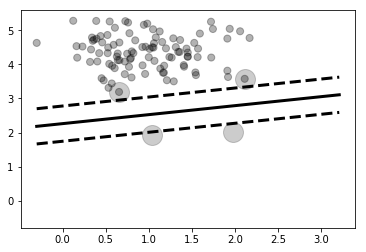

In [5]:
%matplotlib inline

from matplotlib.pylab import subplots
import numpy as np
xi = np.linspace(X[:,0].min(),X[:,0].max(),100)

fig,ax=subplots()
_=ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
_=ax.plot(sv.support_vectors_[:,0],sv.support_vectors_[:,1],'ko',markersize=20,alpha=.2)
_=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- sv.intercept_/sv.coef_[0,1],'k',lw=3.)
margin = np.linalg.norm(sv.coef_)
_=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi-(sv.intercept_+margin/2.)/sv.coef_[0,1],'--k',lw=3.)
_=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi-(sv.intercept_-margin/2.)/sv.coef_[0,1],'--k',lw=3.)

<!-- dom:FIGURE: [fig-machine_learning/svm_003.png, width=500 frac=0.75]  The
two class shown (white and gray circles) are linearly separable. The maximal
margin solution is shown by the dark black line in the middle. The dotted lines
show the extent of the margin.  The large circles indicate the support vectors
for the maximal margin solution. <div id="fig:svm_003"></div> -->
<!-- begin figure -->
<div id="fig:svm_003"></div>

<p>The two class shown (white and gray circles) are linearly separable. The
maximal margin solution is shown by the dark black line in the middle. The
dotted lines show the extent of the margin.  The large circles indicate the
support vectors for the maximal margin solution.</p>
<img src="fig-machine_learning/svm_003.png" width=500>

<!-- end figure -->

In [6]:

def draw_margins(sv,X,y,ax=None):
    sv.fit(X,y)
    xi = np.linspace(X[:,0].min(),X[:,0].max(),100)
    if ax is None: fig,ax=subplots()
    _=ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
    _=ax.plot(sv.support_vectors_[:,0],sv.support_vectors_[:,1],'ko',markersize=20,alpha=.2)
    _=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- sv.intercept_/sv.coef_[0,1],'k',lw=3.)
    margin = np.linalg.norm(sv.coef_)
    _=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_+margin/2.)/sv.coef_[0,1],'--k',lw=3.)
    _=ax.plot(xi,-sv.coef_[0,0]/sv.coef_[0,1]*xi- (sv.intercept_-margin/2.)/sv.coef_[0,1],'--k',lw=3.)

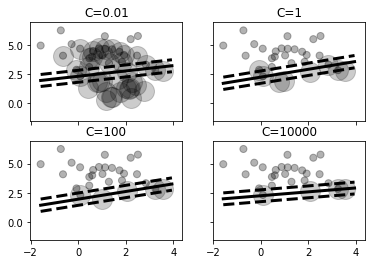

In [7]:

X, y = make_blobs(n_samples=50, centers=2, n_features=2,
                  cluster_std=1,random_state=0)

fig,axs = subplots(2,2,sharex=True,sharey=True)
#fig.set_size_inches((12,6))
sv = SVC(kernel='linear',C=.0100)
draw_margins(sv,X,y,ax=axs[0,0])
_=axs[0,0].set_title('C=0.01')
sv = SVC(kernel='linear',C=1)
draw_margins(sv,X,y,ax=axs[0,1])
_=axs[0,1].set_title('C=1')
sv = SVC(kernel='linear',C=100)
draw_margins(sv,X,y,ax=axs[1,0])
_=axs[1,0].set_title('C=100')
sv = SVC(kernel='linear',C=10000)
draw_margins(sv,X,y,ax=axs[1,1])
_=axs[1,1].set_title('C=10000')

[Figure](#fig:svm_004) shows what happens when the value of $C$ changes.
Increasing this value emphasizes the $\xi$ part of the objective function in
Equation [eq:svm](#eq:svm). As shown in the top left panel, a small value for
$C$ means that
the algorithm is willing to accept many support vectors at the expense of
maximizing the margin. That is, the proportional amount that predictions are on
the wrong side of the margin is more acceptable with smaller $C$.  As the value
of $C$ increases, there are fewer support vectors because the optimization
process prefers to eliminate support vectors that are far away from the margins
and accept fewer of these that encroach into the margin. Note that as the value
of $C$ progresses through this figure, the separating line tilts slightly.

<!-- dom:FIGURE: [fig-machine_learning/svm_004.png, width=500 frac=0.95] The
maximal margin algorithm finds the separating line that maximizes the margin
shown. The elements that touch the margins are the support elements. The dotted
elements are not relevent to the solution. <div id="fig:svm_004"></div>  -->
<!-- begin figure -->
<div id="fig:svm_004"></div>

<p>The maximal margin algorithm finds the separating line that maximizes the
margin shown. The elements that touch the margins are the support elements. The
dotted elements are not relevent to the solution.</p>
<img src="fig-machine_learning/svm_004.png" width=500>

<!-- end figure -->


## Kernel Tricks

Support Vector Machines provide a powerful method to deal with linear
separations, but they can also apply to non-linear boundaries by
exploiting the so-called *kernel trick*.  The convex optimization
formulation of the SVM includes a *dual* formulation that leads to a
solution that requires only the inner-products of the features. The
kernel trick is to substitute inner-products by nonlinear kernel
functions.  This can be thought of as mapping the original features
onto a possibly infinite dimensional space of new features.  That is,
if the data are not linearly separable in two-dimensional space (for
example) maybe they are separable in three-dimensional space (or
higher)?

To make this concrete, suppose the original input space is
$\mathbb{R}^n$ and we want to use a non-linear mapping
$\psi:\mathbf{x} \mapsto \mathcal{F}$ where $\mathcal{F}$ is an
inner-product space of higher dimension.  The kernel trick is to
calculate the inner-product in $\mathcal{F}$ using a kernel
function, $K(\mathbf{x}_i,\mathbf{x}_j) = \langle
\psi(\mathbf{x}_i),\psi(\mathbf{x}_j)\rangle$. The long way to
compute this is to first compute $\psi(\mathbf{x})$ and then do the
inner-product. The kernel-trick way to do it is to use the kernel
function and avoid computing $\psi$. In other words, the kernel
function returns what the inner-product in $\mathcal{F}$ would have
returned if $\psi$ had been applied. For example, to achieve an
$n^{th}$ polynomial mapping of the input space, we can use
$\kappa(\mathbf{x}_i,\mathbf{x}_j)=(\mathbf{x}_i^T\mathbf{x}_j+\theta)^n$.
For example, suppose the input space is $\mathbb{R}^2$ and
$\mathcal{F}=\mathbb{R}^4$ and we have the following mapping,

$$
\psi(\mathbf{x}) : (x_0,x_1) \mapsto (x_0^2,x_1^2,x_0 x_1, x_1 x_0)
$$

 The inner product in $\mathcal{F}$ is then,

$$
\langle \psi(\mathbf{x}),\psi(\mathbf{y})  \rangle = \langle
\mathbf{x},\mathbf{y}  \rangle^2
$$

 In other words, the kernel is the square of the inner
product in input space. The advantage of using the kernel instead of
simply enlarging the feature space is computational because you only
need to compute the kernel on all distinct pairs of the input space.
The following example should help make this concrete. First we create
some Sympy variables,

In [8]:
import sympy as S
x0,x1=S.symbols('x:2',real=True)
y0,y1=S.symbols('y:2',real=True)

Next, we create the $\psi$ function that maps into $\mathbb{R}^4$
and the corresponding kernel function,

In [9]:
psi = lambda x,y: (x**2,y**2,x*y,x*y)
kern = lambda x,y: S.Matrix(x).dot(y)**2

Notice that the inner product in $\mathbb{R}^4$  is
equal to the kernel function, which only uses wthe $\mathbb{R}^2$
variables.

In [11]:
print(S.Matrix(psi(x0,x1)).dot(psi(y0,y1)))
print(S.expand(kern((x0,x1),(y0,y1)))) # same as above

x0**2*y0**2 + 2*x0*x1*y0*y1 + x1**2*y1**2
x0**2*y0**2 + 2*x0*x1*y0*y1 + x1**2*y1**2


**Polynomial Regression Using Kernels.**  Recall our favorite
linear regression problem from the regularization chapter,

$$
\min_{\boldsymbol{\beta}}  \Vert y - \mathbf{X}\boldsymbol{\beta}\Vert^2
$$

 where $\mathbf{X}$ is a $n\times m$ matrix with $m>n$. As
we discussed, there are multiple solutions to this problem. The
least-squares solution is the following:

$$
\boldsymbol{\beta}_{LS}=\mathbf{X}^T(\mathbf{X}\mathbf{X}^T)^{\text{-1}}\mathbf{
y}
$$

 Given a new feature vector $\mathbf{x}$, the corresponding estimator
for $\mathbf{y}$ is the following,

$$
\hat{\mathbf{y}} = \mathbf{x}^T\boldsymbol{\beta}_{LS}=\mathbf{x}^T\mathbf{X}^T(
\mathbf{X}\mathbf{X}^T)^{\text{-1}}\mathbf{y}
$$

 Using the kernel trick, the solution can be written more generally as
the following,

$$
\hat{\mathbf{y}}=\mathbf{k}(\mathbf{x})^T\mathbf{K}^{\text{-1}}\mathbf{y}
$$

 where the $n\times n$ kernel matrix $\mathbf{K}$ replaces
$\mathbf{X}\mathbf{X}^T$ and where $\mathbf{k}(\mathbf{x})$ is a $n$-vector of
components $\mathbf{k}(\mathbf{x})=[\kappa(\mathbf{x}_i,\mathbf{x})]$ and where
$\mathbf{K}_{i,j}=\kappa(\mathbf{x}_i,\mathbf{x}_j)$ for the kernel function
$\kappa$.  With this more general setup, we can substitute
$\kappa(\mathbf{x}_i,\mathbf{x}_j)=(\mathbf{x}_i^T\mathbf{x}_j+\theta)^n$ for
$n^{th}$-order polynomial regression [[bauckhagenumpy]](#bauckhagenumpy). Note
that ridge
regression can also be incorporated by inverting $(\mathbf{K}+\alpha
\mathbf{I})$, which can help stabilize poorly conditioned $\mathbf{K}$ matrices
with a tunable $\alpha$ hyper-parameter [[bauckhagenumpy]](#bauckhagenumpy).

For some kernels, the enlarged $\mathcal{F}$ space is infinite-dimensional.
Mercer's conditions provide technical restrictions on the kernel functions.
Powerful, well-studied kernels have been implemented in Scikit-learn. The
advantage of kernel functions may evaporate for when $n\rightarrow m$ in which
case using the $\psi$ functions instead can be more practicable.

<!-- !bt -->
<!-- \begin{pyconsole} -->
<!-- sv = SVC(kernel='rbf',C=1000) -->
<!-- sv.fit(X,y) -->
<!-- \end{pyconsole} -->
<!-- !et -->

<!-- FIGURE: [fig-machine_learning/svm_005.png, width=500 frac=0.85] Using a
radial basis function kernel, the SVM can generate a curved separating surface
that can classify the two classes shown. <div id="fig:svm_005"></div> -->

<!-- As shown in [Figure](#fig:svm_002), the maximal margin algorithm finds the
-->
<!-- separating line that maximizes the margin shown. As a result, the data
shown by -->
<!-- the dotted circles are no longer relevant to the *support* of the line.
That -->
<!-- is, the dotted circles could be removed with changing the final result. -->

<!-- Kernel trick -->
<!-- objective function includes VC dimension -->

<!-- *Modern Multivariate Statistical Techniques Izenman, p. 371* -->
<!-- *Learning and Soft computing by Kecman, p.154, 171, 186* -->
<!-- *Mastering machine learning with Scikit-learn, p.174* -->
<!-- *Gaussian Processes for Machine Learning, p. 163* -->
<!-- *Elements of statistical learning p.418* -->
<!-- *Kernel methods pattern Taylor p.43* -->
<!-- *Learning with Kernels, p.43* -->
<!-- *An Intro to Machine Learning by james, p.362* -->

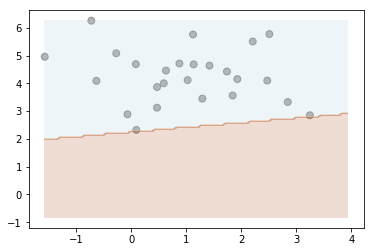

In [12]:
from matplotlib.pylab import cm
xi = np.linspace(X[:,0].min(),X[:,0].max(),100)
yi = np.linspace(X[:,1].min(),X[:,1].max(),100)

fig,ax=subplots()
_=ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='gray',marker='o',alpha=.3)
Xi,Yi = np.meshgrid(xi,yi)
Zi=sv.predict(np.c_[Xi.ravel(),Yi.ravel()]).reshape(Xi.shape)

_=ax.contourf(Xi,Yi,Zi,cmap=cm.Paired,alpha=0.2);